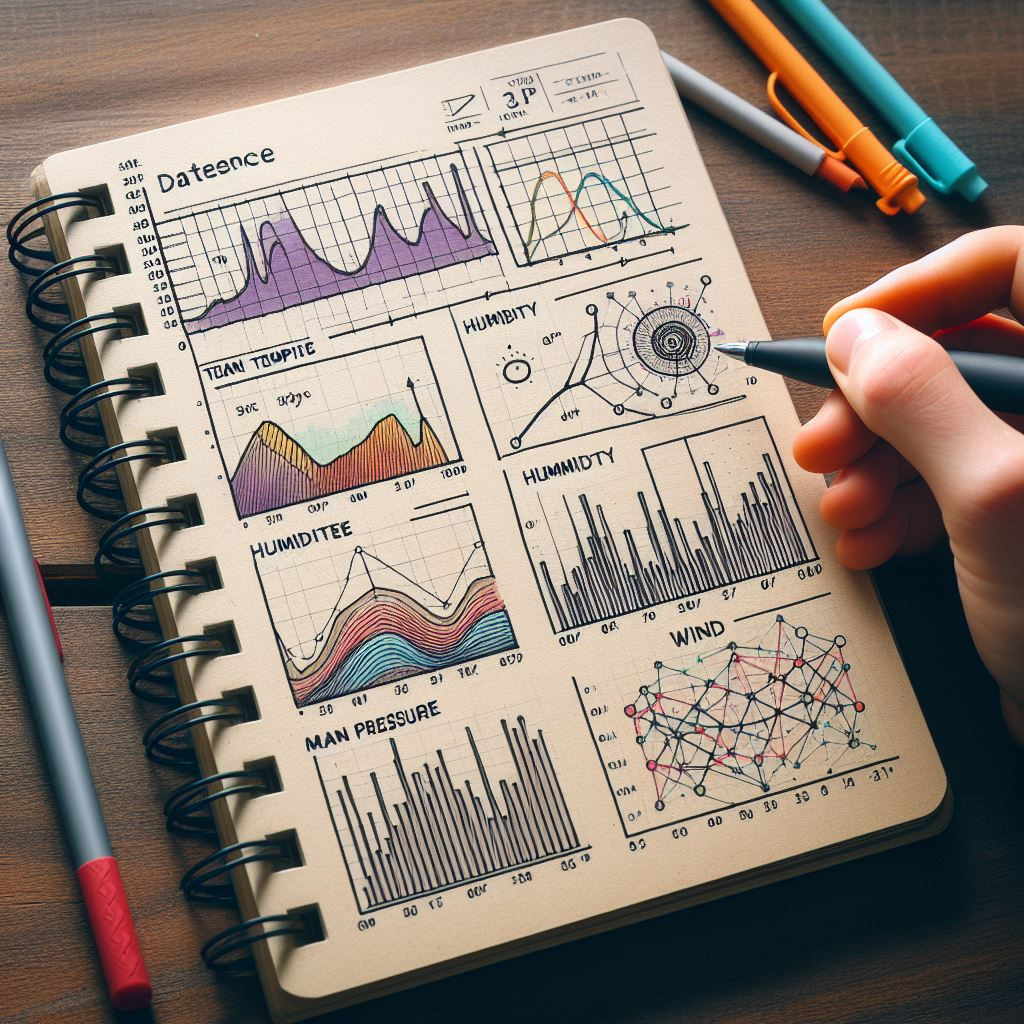

<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    LSTM || DailyDelhiClimate
</div>


<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Import Data Set
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
Train = pd.read_csv('DailyDelhiClimateTrain.csv',
                 index_col='date',
                 parse_dates=True
                )
Test = pd.read_csv('DailyDelhiClimateTest.csv',
                 index_col='date',
                 parse_dates=True
                )

In [3]:
df = pd.concat([Train,Test])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

DatetimeIndex: 1576 entries, 2013-01-01 to 2017-04-24

Data columns (total 4 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   meantemp      1576 non-null   float64

 1   humidity      1576 non-null   float64

 2   wind_speed    1576 non-null   float64

 3   meanpressure  1576 non-null   float64

dtypes: float64(4)

memory usage: 61.6 KB


meantemp: Bu sütun, her bir tarihte ölçülen ortalama sıcaklık değerlerini (derece Celsius cinsinden) içerir.


humidity: Nem değerlerini temsil eder. Bu sütun, her bir tarihte ölçülen nem seviyelerini (% cinsinden) içerir.


wind_speed: Rüzgar hızı değerlerini temsil eder. Bu sütun, her bir tarihte ölçülen rüzgar hızı değerlerini (km/s cinsinden) içerir.


meanpressure: Ortalama basınç değerlerini temsil eder. Bu sütun, her bir tarihte ölçülen ortalama basınç değerlerini (hPa cinsinden) içerir.

In [5]:
df.head(5)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667
2013-01-04,8.667,71.333,1.233,1017.167
2013-01-05,6.000,86.833,3.700,1016.500


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantemp,1576.000,25.222,7.345,6.000,18.500,27.167,31.143,38.714
humidity,1576.000,60.445,16.980,13.429,49.750,62.440,72.125,100.000
wind_speed,1576.000,6.899,4.511,0.000,3.700,6.364,9.262,42.220
meanpressure,1576.000,1010.593,175.243,-3.042,1001.875,1009.056,1015.200,7679.333


In [7]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
df.head(3)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667


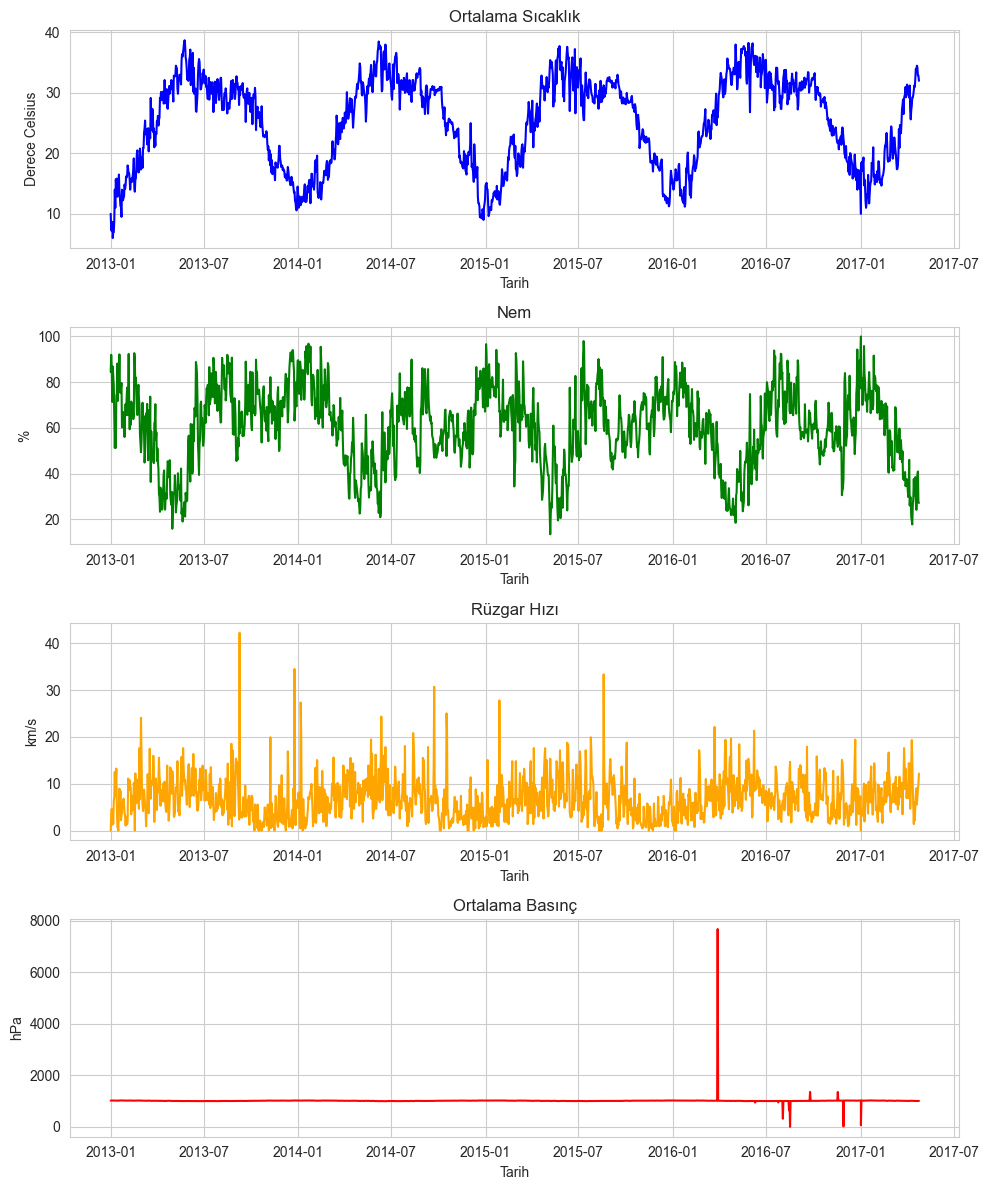

In [9]:
import matplotlib.pyplot as plt

# Tüm sütunları görselleştirme
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

# Ortalama Sıcaklık (meantemp)
axes[0].plot(df.index, df['meantemp'], color='blue')
axes[0].set_title('Ortalama Sıcaklık')
axes[0].set_ylabel('Derece Celsius')

# Nem (humidity)
axes[1].plot(df.index, df['humidity'], color='green')
axes[1].set_title('Nem')
axes[1].set_ylabel('%')

# Rüzgar Hızı (wind_speed)
axes[2].plot(df.index, df['wind_speed'], color='orange')
axes[2].set_title('Rüzgar Hızı')
axes[2].set_ylabel('km/s')

# Ortalama Basınç (meanpressure)
axes[3].plot(df.index, df['meanpressure'], color='red')
axes[3].set_title('Ortalama Basınç')
axes[3].set_ylabel('hPa')

# Eksen etiketlerini döndürme
for ax in axes:
    ax.set_xlabel('Tarih')

# Grafikleri düzenleme
plt.tight_layout()
plt.show()


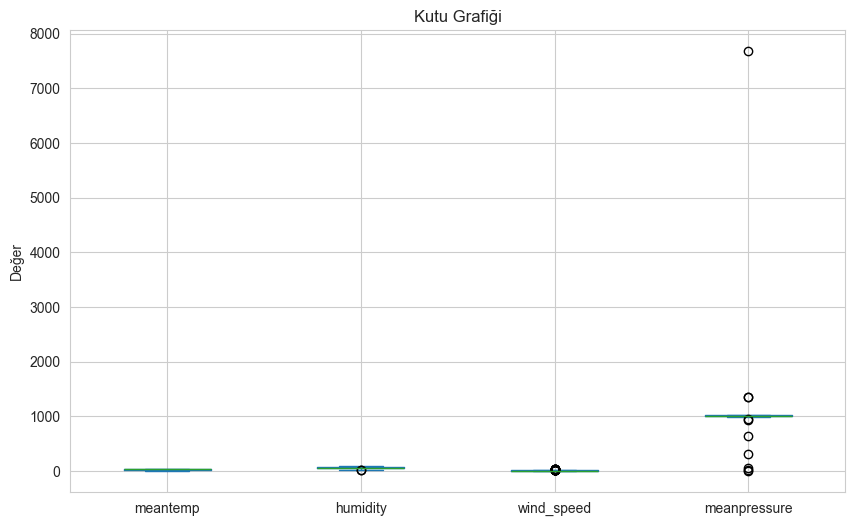

In [10]:
# Kutu grafiği oluşturma
df.plot(kind='box', figsize=(10, 6))
plt.title('Kutu Grafiği')
plt.ylabel('Değer')
plt.show()


In [11]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour 
df["date"] = df.index.date

In [12]:
df.head(10)

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,hour,date
date,,,,,,,,,,
2013-01-01,10.000,84.500,0.000,1015.667,2013,1,1,1,0,2013-01-01
2013-01-02,7.400,92.000,2.980,1017.800,2013,1,2,2,0,2013-01-02
2013-01-03,7.167,87.000,4.633,1018.667,2013,1,3,3,0,2013-01-03
2013-01-04,8.667,71.333,1.233,1017.167,2013,1,4,4,0,2013-01-04
2013-01-05,6.000,86.833,3.700,1016.500,2013,1,5,5,0,2013-01-05
2013-01-06,7.000,82.800,1.480,1018.000,2013,1,6,6,0,2013-01-06
2013-01-07,7.000,78.600,6.300,1020.000,2013,1,7,0,0,2013-01-07
2013-01-08,8.857,63.714,7.143,1018.714,2013,1,8,1,0,2013-01-08
2013-01-09,14.000,51.250,12.500,1017.000,2013,1,9,2,0,2013-01-09


In [13]:
df.tail(10)

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,hour,date
date,,,,,,,,,,
2017-04-15,31.222,30.444,5.967,1002.444,2017,4,15,5,0,2017-04-15
2017-04-16,31.000,34.250,2.100,1003.250,2017,4,16,6,0,2017-04-16
2017-04-17,32.556,38.444,5.367,1004.444,2017,4,17,0,0,2017-04-17
2017-04-18,34.000,27.333,7.811,1003.111,2017,4,18,1,0,2017-04-18
2017-04-19,33.500,24.125,9.025,1000.875,2017,4,19,2,0,2017-04-19
2017-04-20,34.500,27.500,5.562,998.625,2017,4,20,3,0,2017-04-20
2017-04-21,34.250,39.375,6.963,999.875,2017,4,21,4,0,2017-04-21
2017-04-22,32.900,40.900,8.890,1001.600,2017,4,22,5,0,2017-04-22
2017-04-23,32.875,27.500,9.963,1002.125,2017,4,23,6,0,2017-04-23


In [14]:
df['date'].diff().dropna().iloc[0]

Timedelta('1 days 00:00:00')

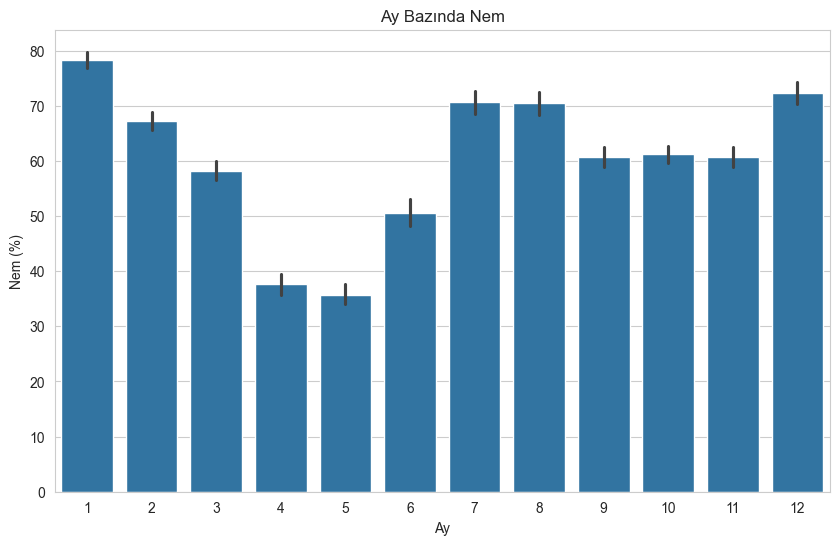

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='humidity', data=df)
plt.title('Ay Bazında Nem')
plt.xlabel('Ay')
plt.ylabel('Nem (%)')
plt.show()


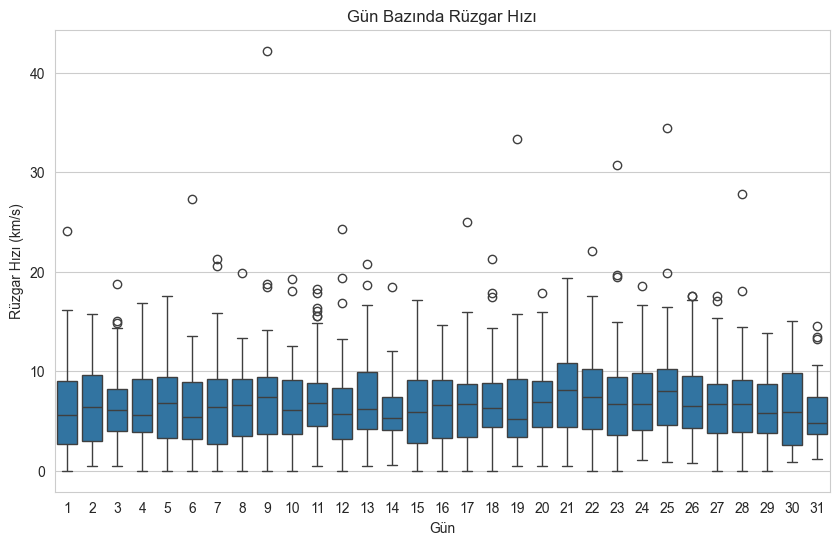

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='wind_speed', data=df)
plt.title('Gün Bazında Rüzgar Hızı')
plt.xlabel('Gün')
plt.ylabel('Rüzgar Hızı (km/s)')
plt.show()


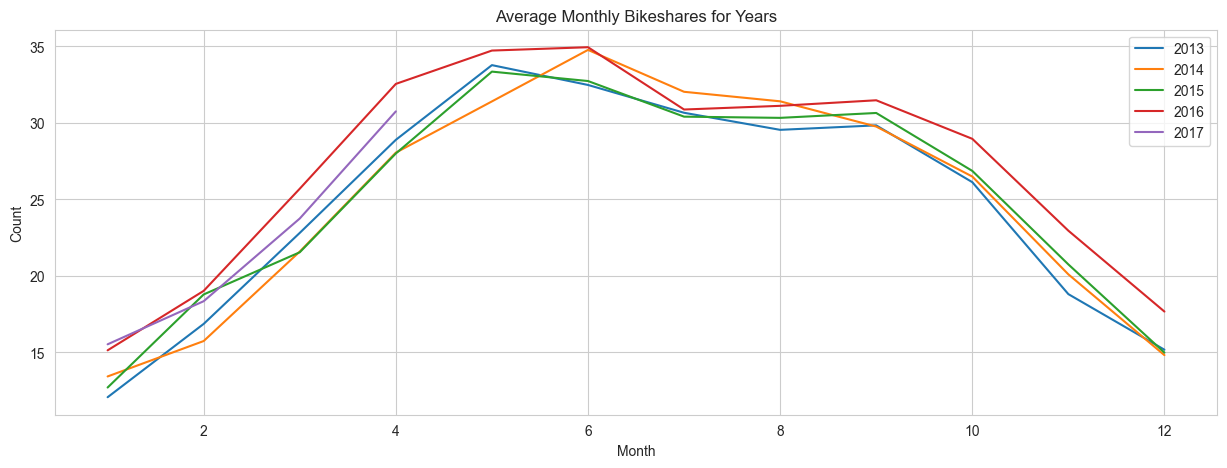

In [17]:
year_month_cnt = df.groupby(["year", "month"])["meantemp"].mean()    # yıllara sari bir şekilde görmek istersek bunu yapıyoruz.

plt.figure(figsize=(15,5))        #2017 de çok az veri olduğu için burada göremiyoruz. 
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

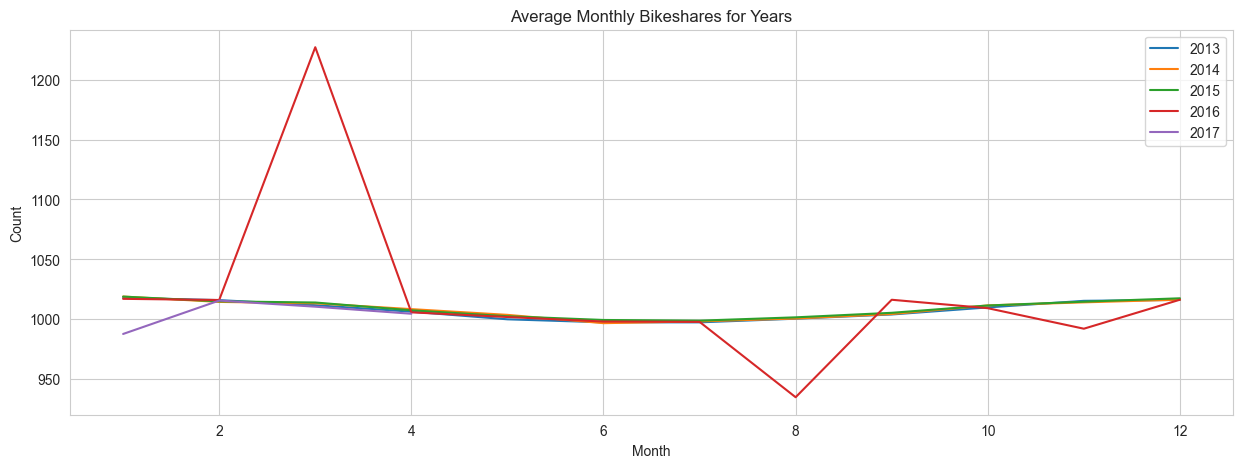

In [18]:
year_month_cnt = df.groupby(["year", "month"])["meanpressure"].mean()    # yıllara sari bir şekilde görmek istersek bunu yapıyoruz.

plt.figure(figsize=(15,5))        #2017 de çok az veri olduğu için burada göremiyoruz. 
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

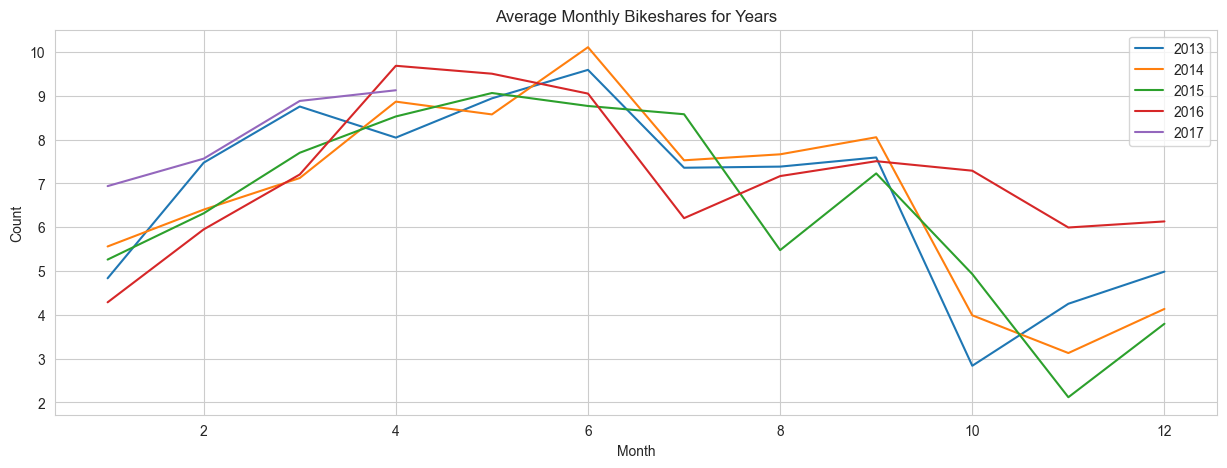

In [19]:
year_month_cnt = df.groupby(["year", "month"])["wind_speed"].mean()    # yıllara sari bir şekilde görmek istersek bunu yapıyoruz.

plt.figure(figsize=(15,5))        #2017 de çok az veri olduğu için burada göremiyoruz. 
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

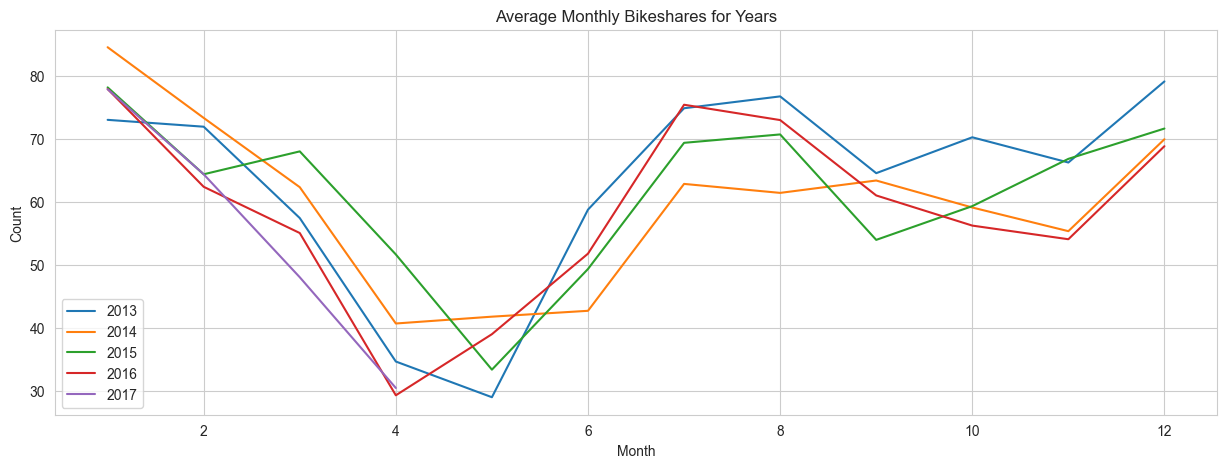

In [20]:
year_month_cnt = df.groupby(["year", "month"])["humidity"].mean()    # yıllara sari bir şekilde görmek istersek bunu yapıyoruz.

plt.figure(figsize=(15,5))        #2017 de çok az veri olduğu için burada göremiyoruz. 
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

In [21]:
df.head(1)

,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek,hour,date
date,,,,,,,,,,
2013-01-01,10.000,84.500,0.000,1015.667,2013,1,1,1,0,2013-01-01


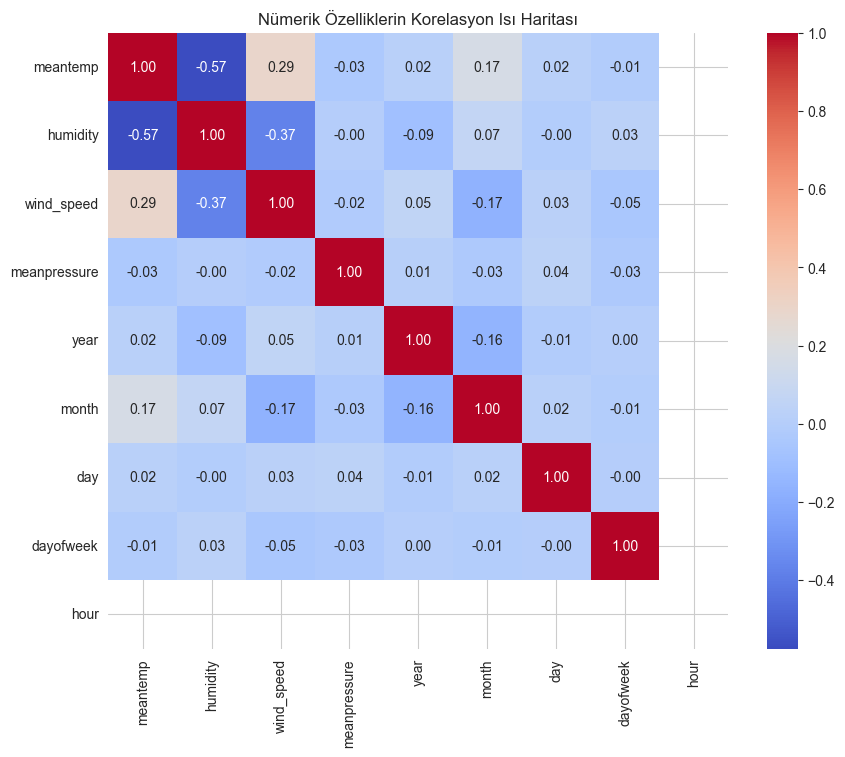

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece nümerik sütunları içeren bir alt veri çerçevesi oluşturma
numeric_df = df[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month', 'day', 'dayofweek', 'hour']]

# Korelasyon matrisini hesaplama
correlation_matrix = numeric_df.corr()

# Korelasyon ısı haritasını çizme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Nümerik Özelliklerin Korelasyon Isı Haritası')
plt.show()


In [23]:
data = df.drop(["year","month","day","dayofweek","hour","date"], axis=1)

In [24]:
data.head(3)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>

DatetimeIndex: 1576 entries, 2013-01-01 to 2017-04-24

Data columns (total 4 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   meantemp      1576 non-null   float64

 1   humidity      1576 non-null   float64

 2   wind_speed    1576 non-null   float64

 3   meanpressure  1576 non-null   float64

dtypes: float64(4)

memory usage: 61.6 KB


<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Data Pre-Processing
</div>


In [26]:
data.shape

(1576, 4)

In [27]:
train_size = int(len(data) * 0.9)
test_size = len(data) - train_size

train, test = data.iloc[0:train_size], data.iloc[train_size:len(df)]
print(len(train), len(test))

1418 158


In [28]:
train.shape

(1418, 4)

In [29]:
test.shape

(158, 4)

In [30]:
train.head(1)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667


<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Scaling
</div>


In [31]:
from sklearn.preprocessing import RobustScaler

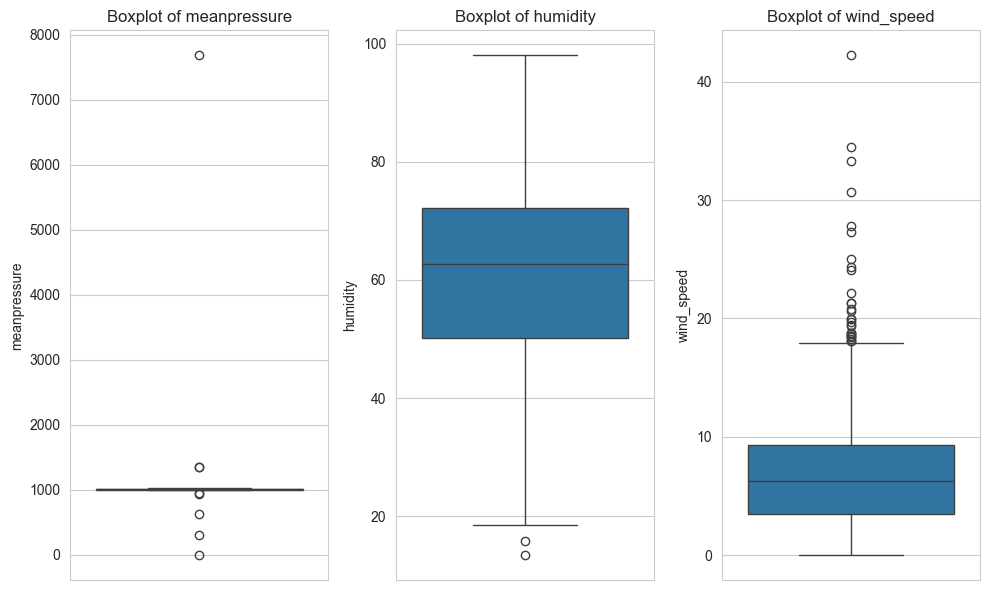

In [32]:
f_columns = ['meanpressure', 'humidity', 'wind_speed']
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)  # 1 satır, 3 sütun, 1. grafik
sns.boxplot(y=train['meanpressure'])
plt.title('Boxplot of meanpressure')

plt.subplot(1, 3, 2)  # 1 satır, 3 sütun, 2. grafik
sns.boxplot(y=train['humidity'])
plt.title('Boxplot of humidity')

plt.subplot(1, 3, 3)  # 1 satır, 3 sütun, 3. grafik
sns.boxplot(y=train['wind_speed'])
plt.title('Boxplot of wind_speed')

plt.tight_layout()  # Grafikler arasındaki boşlukları ayarlar
plt.show()

In [33]:
f_columns = ['meanpressure', 'humidity', 'wind_speed']

f_transformer = RobustScaler()   # feature ler için kullanılan scale
target_transformer = RobustScaler()   # target için kullanılan scale

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
#  train.loc[:, f_columns] ifadesi, train veri setindeki tüm satırları ve f_columns listesinde belirtilen sütunları seçer
train['meantemp'] = target_transformer.fit_transform(train[['meantemp']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
#test.loc[:, f_columns] ifadesi, test veri setindeki tüm satırları ve f_columns listesinde belirtilen sütunları seçer. 

test['meantemp'] = target_transformer.transform(test[['meantemp']])

In [34]:
train.head(3)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,-1.491,0.995,-1.081,0.564
2013-01-02,-1.704,1.336,-0.566,0.724
2013-01-03,-1.723,1.108,-0.280,0.789


In [35]:
def create_dataset(X, y, time_steps=1):  # buraya X ve y train i vereceğiz.
   
    Xs, ys = [], []   # 2 tane boş liste oluşturuyor ve bunlara X ve y train leri atayacağız. 
    for i in range(len(X) - time_steps):      # length i ne ise oraya kadar gidecek.
        v = X.iloc[i:(i + time_steps)].values # her döngüde bana verdiğim train data sını O İLE 1 arasını value yani data frame olarak al
        Xs.append(v)                          # bu değeri ilk listenin içine at. paketler halinde atacak.. 0.24, 1-25 etc..
        ys.append(y.iloc[i + time_steps])   # bu sefer i (0) + 23 (indes) yani 24 nci datayı y ye koy
    return np.array(Xs), np.array(ys)  # daha sonra bunları array e çevir..

In [36]:
time_steps = 24  

X_train, y_train = create_dataset(train, train.meantemp, time_steps)
X_test, y_test = create_dataset(test, test.meantemp, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# reshape to [samples, time_steps, n_features]

(1394, 24, 4) (1394,)

(134, 24, 4) (134,)


In [37]:
X_train

array([[[-1.49061033e+00,  9.94579803e-01, -1.08124807e+00,
          5.64428110e-01],
        [-1.70422535e+00,  1.33557859e+00, -5.65708990e-01,
          7.24089542e-01],
        [-1.72339593e+00,  1.10824607e+00, -2.79682834e-01,
          7.88951999e-01],
        ...,
        [-1.53169014e+00,  7.74825028e-01, -5.47832355e-01,
          1.02345473e+00],
        [-1.16197183e+00, -1.11771826e-01, -3.86365977e-01,
          9.26161042e-01],
        [-1.17566510e+00, -8.90385729e-02, -1.44166409e-02,
          9.26161042e-01]],

       [[-1.70422535e+00,  1.33557859e+00, -5.65708990e-01,
          7.24089542e-01],
        [-1.72339593e+00,  1.10824607e+00, -2.79682834e-01,
          7.88951999e-01],
        [-1.60015649e+00,  3.95937484e-01, -8.67881784e-01,
          6.76690055e-01],
        ...,
        [-1.16197183e+00, -1.11771826e-01, -3.86365977e-01,
          9.26161042e-01],
        [-1.17566510e+00, -8.90385729e-02, -1.44166409e-02,
          9.26161042e-01],
        [-1.305

In [38]:
y_train

array([-1.30575117, -1.271518  , -1.25586854, ..., -0.52365475,
       -0.52681473, -0.52681473])

<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
   Model Building with LSTM
</div>


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
X_train.shape

(1394, 24, 4)

In [41]:
y_train.shape

(1394,)

In [42]:
n_features = X_train.shape[2]

In [43]:
n_features

4

In [44]:
model = Sequential()

# İlk Bidirectional LSTM katmanı
model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))

# Dropout katmanı (opsiyonel, karmaşıklığı artırmak için)
model.add(Dropout(0.2))

# Tam bağlantı (dense) katmanı
model.add(Dense(units=64, activation='relu'))

# Çıkış katmanı
model.add(Dense(units=1))

# Modeli derleme
model.compile(optimizer='adam', loss='mse')

# Modelin özetini yazdırma
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [46]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=64, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.1222 - val_loss: 0.0537

Epoch 2/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0402 - val_loss: 0.0417

Epoch 3/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0315 - val_loss: 0.0425

Epoch 4/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0279 - val_loss: 0.0389

Epoch 5/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0261 - val_loss: 0.0376

Epoch 6/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0265 - val_loss: 0.0388

Epoch 7/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0252 - val_loss: 0.0410

Epoch 8/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0258 - val_loss: 0.0376

Epoch 9/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0226 - val_loss: 0.0387

Epoch 10/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0231 - val_loss: 0.0372

Epoch 11/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0222 - val_loss: 0.0388

Epoch 12/30

16/16 ━━━━━━━━━━━━━━━━━━━━ 

<Axes: >

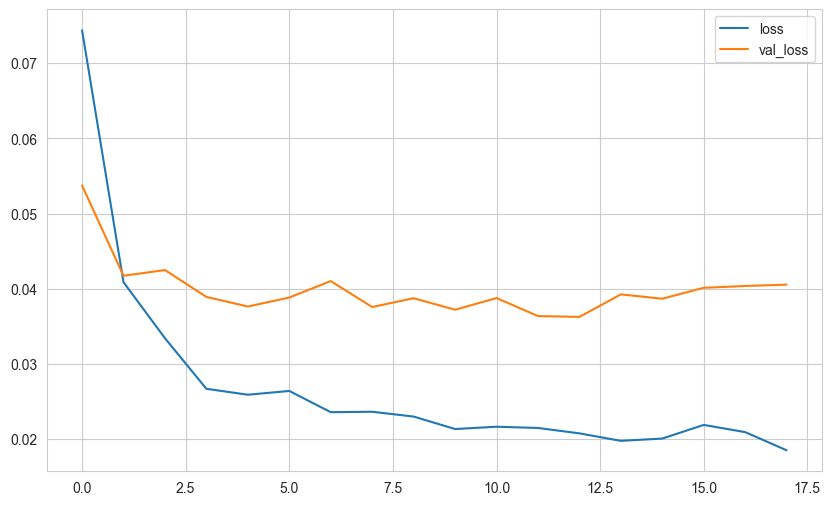

In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
     Evaluate on Test Data
</div>


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [50]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step


In [51]:
eval_metrics(y_test, y_pred)

r2_score: 0.7893017831327737 

mae: 0.18964856535793784 

mse: 0.05433274872016129 

rmse: 0.23309386246780778



<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Inverse Transformation and Compare
</div>


In [52]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   # reshape ile tek satır haline getirmiş oluyoruz
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))     # kaç sütun ise o kadar sütun olacak
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [53]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
#pred_test.index = test_index

In [54]:
pred_test

,test,prediction
0,19.050,20.041
1,18.556,21.065
2,18.167,21.801
3,15.833,22.440
4,17.500,22.134
...,...,...
129,34.500,34.133
130,34.250,34.459
131,32.900,34.193
132,32.875,33.616


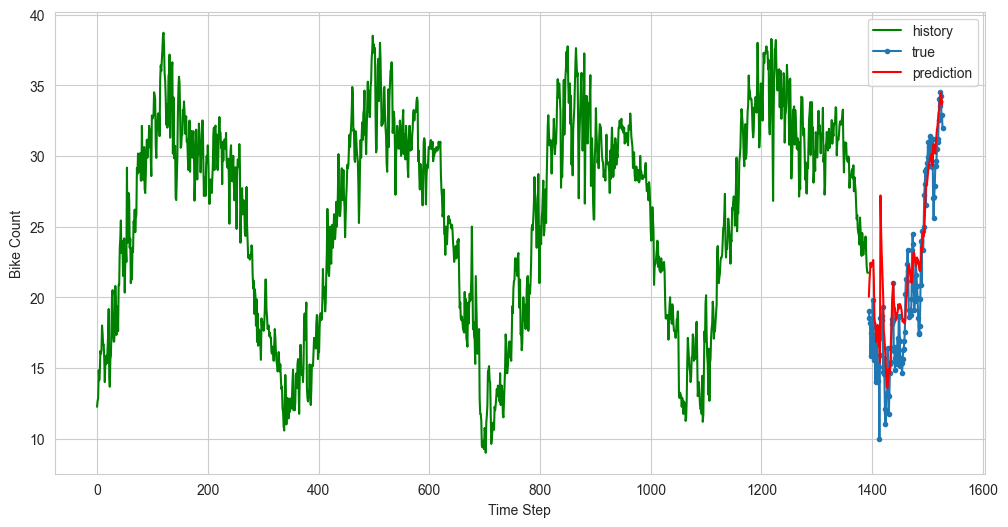

In [55]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

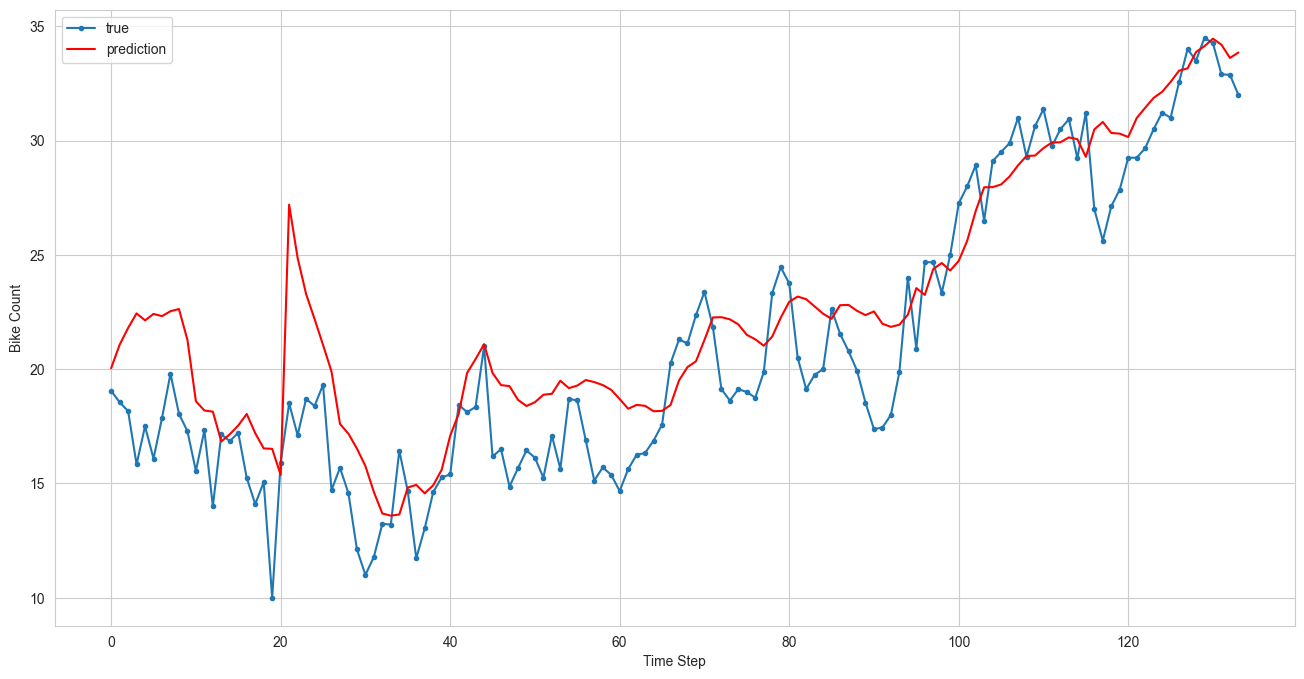

In [56]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

### 
<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
    Retrain and Forecasting
</div>


<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
   Scale full data
</div>

In [57]:
val_size = 24
val = data.iloc[-val_size:]
full = data.iloc[:-val_size]
print(len(full), len(val))

1552 24


In [58]:
f_columns = ['meanpressure', 'humidity', 'wind_speed']

f_transformer = RobustScaler()
target_transformer = RobustScaler()

full.loc[:, f_columns] = f_transformer.fit_transform(full[f_columns].to_numpy())
full['meantemp'] = target_transformer.fit_transform(full[['meantemp']])

val.loc[:, f_columns] = f_transformer.transform(val[f_columns])
val['meantemp'] = target_transformer.transform(val[['meantemp']])

In [59]:
full

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,-1.347,0.986,-1.105,0.480
2013-01-02,-1.552,1.327,-0.580,0.639
2013-01-03,-1.571,1.100,-0.289,0.704
2013-01-04,-1.452,0.388,-0.888,0.592
2013-01-05,-1.663,1.092,-0.454,0.542
...,...,...,...,...
2017-03-27,0.198,-1.099,1.299,0.020
2017-03-28,0.229,-1.006,0.452,-0.017
2017-03-29,0.317,-1.287,1.219,-0.157


In [60]:
X, y = create_dataset(full, full.meantemp, time_steps)

print(X.shape, y.shape)

(1528, 24, 4) (1528,)



<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
  Create Final model with full data 
</div>

In [61]:
model = Sequential()

# İlk Bidirectional LSTM katmanı
model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))

# Dropout katmanı (opsiyonel, karmaşıklığı artırmak için)
model.add(Dropout(0.2))

# Tam bağlantı (dense) katmanı
model.add(Dense(units=64, activation='relu'))

# Çıkış katmanı
model.add(Dense(units=1))

# Modeli derleme
model.compile(optimizer='adam', loss='mse')

# Modelin özetini yazdırma
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.fit(X, y, 
          epochs=30, 
          batch_size=128        
         )

Epoch 1/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.1405

Epoch 2/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0409

Epoch 3/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0317

Epoch 4/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0276

Epoch 5/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0262

Epoch 6/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0260

Epoch 7/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0247

Epoch 8/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0224

Epoch 9/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0209

Epoch 10/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0214

Epoch 11/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0217

Epoch 12/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0211

Epoch 13/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0197

Epoch 14/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0196

Epoch 15/30

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s

<Axes: >

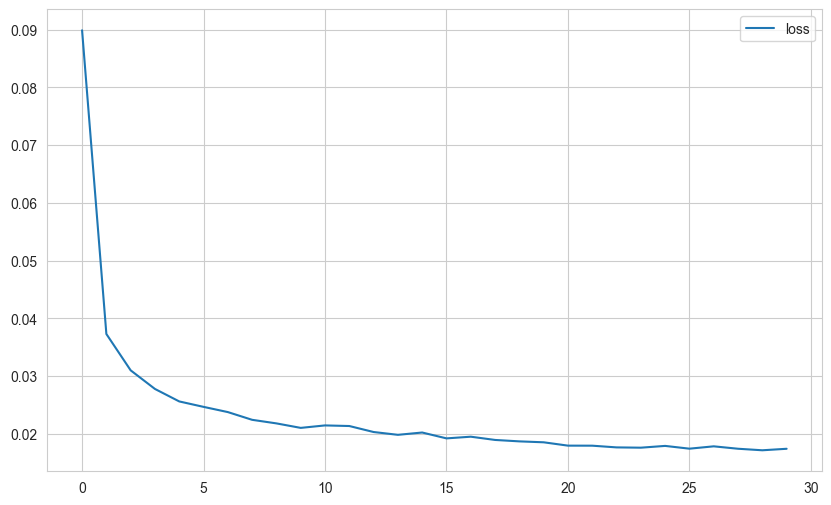

In [63]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [64]:
df_fake = val.iloc[:,1:]
df_fake

,humidity,wind_speed,meanpressure
date,,,
2017-04-01,-1.258,0.486,-0.316
2017-04-02,-1.321,0.526,-0.372
2017-04-03,-1.503,0.117,-0.372
2017-04-04,-1.406,1.417,-0.152
2017-04-05,-0.764,1.428,-0.316
2017-04-06,-1.673,1.286,-0.473
2017-04-07,-1.497,-0.286,-0.138
2017-04-08,-1.520,0.363,0.085
2017-04-09,-1.895,1.382,0.104


In [65]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([ 0.34653465,  0.21782178,  0.27722772,  0.31155116,  0.17669459,
        0.33443344,  0.        , -0.10891089,  0.00990099,  0.0678925 ,
        0.17821782,  0.17821782,  0.21122112,  0.27722772,  0.33443344,
        0.31683168,  0.440044  ,  0.55445545,  0.51485149,  0.59405941,
        0.57425743,  0.46732673,  0.46534653,  0.3960396 ])

In [66]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
current_batch = current_batch.astype('float32')

features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [67]:
eval_metrics(reel.reshape((1,-1))[0], forecast)


r2_score: 0.2664957265956073 

mae: 0.1287640581430544 

mse: 0.024979767535169745 

rmse: 0.15804988938676845


In [68]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[30.855011, 31.129221, 31.062183, 31.178837, 30.89999 , 29.929794,
        30.992725, 30.993076, 30.02346 , 29.96129 , 29.834469, 30.758446,
        31.292099, 31.953682, 32.576714, 33.130413, 33.48109 , 33.370193,
        34.33616 , 35.022217, 35.486946, 35.004044, 34.299896, 34.647015]],
      dtype=float32)

In [69]:
test.tail()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-04-20,0.522,-1.605,-0.126,-0.791
2017-04-21,0.502,-1.065,0.121,-0.698
2017-04-22,0.391,-0.996,0.460,-0.569
2017-04-23,0.389,-1.605,0.649,-0.530
2017-04-24,0.317,-1.621,1.036,-0.379


In [70]:
forecast_index = pd.date_range(start = '2017-04-23 00:00:00', periods = periods, freq = 'H')

In [71]:
forecast_array = np.array(forecast)
forecast_df = pd.DataFrame(data=forecast_array.reshape(-1, 1), index=forecast_index, columns=['Forecast'])


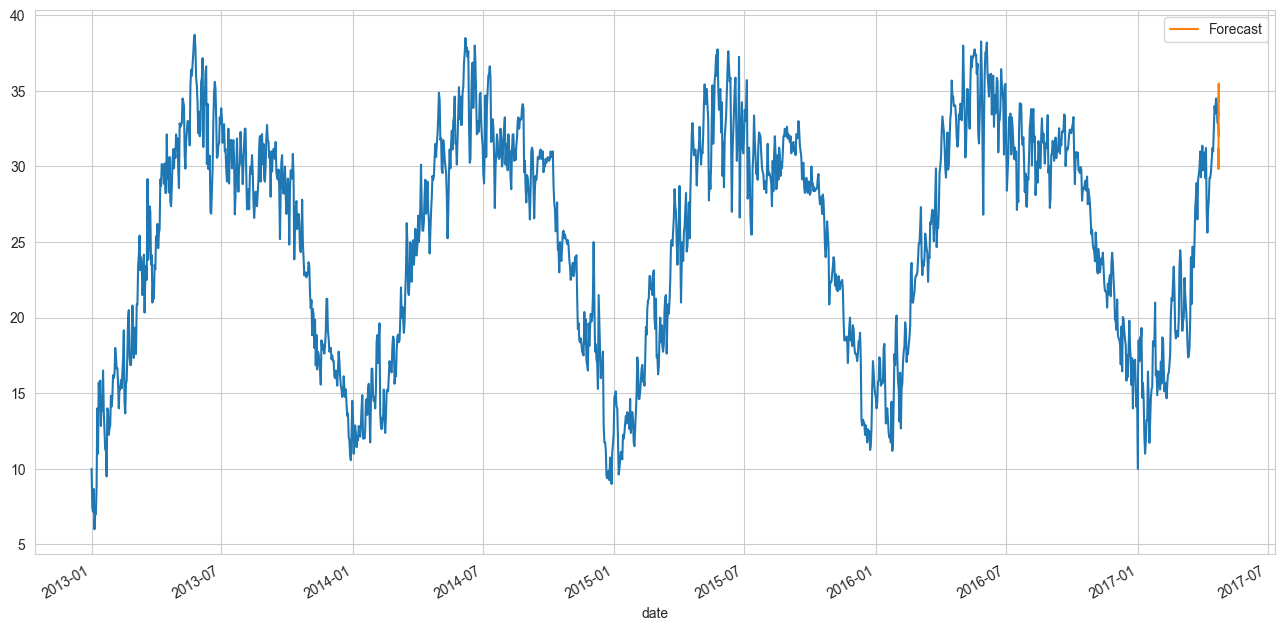

In [72]:
ax = data["meantemp"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));


<a id="2.0"></a>
<div style="font-family: 'Arial', sans-serif; font-size: 24px; font-style: italic; letter-spacing: 1px; background-color: #8BC34A; color: #FFFFFF; border-radius: 5px; padding: 5px; text-align: center; font-weight: bold;">
  Congratulations
</div>